# **Lending Club Case Study**


*  Authors: Harinika Pulloori, Megha Das 
*  Email-ID: harinikaffe@gmail.com, megha_das03@yahoo.in  

**Data Science Toolkit >> Group Case Study 1**

## **Problem Statement**
A consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. <br>
*Two types of risks are associated with the bank’s decision:*

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Primary aim is to ***identify patterns*** which indicate if a person is likely to default, which may be used for taking suitable actions 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). <br>
***The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. These customers are also known as charged-off customers*** 

## Goals of the Case Study:
Understand the driving factors (or driver variables) behind loan default, i.e. the *variables* which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment

## Approach: 
Analyse the various factors and their significance in driving risk for customers who have defaulted in the past based on the data available. 
* *Data Treatment and Sense Check* - Perform preliminary data cleaning to avoid bias and transform it into an actionable format. Improve the quality of the data to report an error free analysis
* Perform Univariate analysis to understand the distribution of various continuous variables and the frequency distributions for categorical variables
* Perform Bivariate Analysis to understand the various drivers or indicators that could cause a borrower to default
* Multivariate Analysis : Understand the relationship among the different variables to capture any hidden insights
* Final Recommendations

#### Loading the data


In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan=pd.read_csv('loan.csv',encoding='palmos',low_memory=False)

Taking a look at the first few rows

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## **Data Treatment**
* Establish the primary key 
* Shape of the dataset to get number of rows and columns
* Identify the appropriate data type for each column and change the data type
* Retain only the relevant columns - Drop the columns which don't provide useful insights
* Missing Value Treatment - Handle the missing values, by removing the columns and rows that have a huge % of missing values and perform imputations wherever necessary
* Outlier Analysis - To remove any sort of bias in the data

In [4]:
# Check the shape of the data
loan.shape

(39717, 111)

There are about 111 columns and 39,717 rows. 

In [5]:
# Establish the primary key
print("Number of unqiue loan listings (id): ", loan['id'].nunique())
print("Number of unqiue borrower members (member_id): ", loan['id'].nunique())

Number of unqiue loan listings (id):  39717
Number of unqiue borrower members (member_id):  39717


Both the borrower members as well as the number of loan listings are unique, meaning each row is for a separate individual <br>


Analyse each of the columns and the values they contain from the data dictionary and retain only the important columns. The main drivers for defaulting on a loan can be understood from the remaining variables <br>

### Missing Value Analysis
We first figure out which of the columns contain only missing values so that we can go ahead and drop them <br>

Subsequently, we decide on a threshold for the number of missing values in a column or row, and delete those which are above the threshold




In [6]:
loan.columns[loan.isnull().sum() == loan.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

We can go ahead and drop the above columns


In [7]:
loan.drop(labels  = loan.columns[loan.isnull().sum() == loan.shape[0]],axis=1,inplace=True)

In [8]:
loan.shape

(39717, 57)

In [9]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

Based on the data dictionary as well as the unique values in each column, we can decide on whether to remove or retain certain columns


In [10]:
for i in loan.columns:
  print("Unique Values in " + i + " are :" , loan[i].unique())

Unique Values in id are : [1077501 1077430 1077175 ...   90395   90376   87023]
Unique Values in member_id are : [1296599 1314167 1313524 ...   90390   89243   86999]
Unique Values in loan_amnt are : [ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  81

Unique Values in next_pymnt_d are : [nan 'Jun-16' 'Jul-16']
Unique Values in last_credit_pull_d are : ['May-16' 'Sep-13' 'Apr-16' 'Jan-16' 'Dec-14' 'Aug-12' 'Mar-13' 'Dec-15'
 'Aug-13' 'Nov-12' 'Mar-14' 'Apr-15' 'May-14' 'Jul-15' 'Feb-16' 'Mar-16'
 'Sep-12' 'May-13' 'Jan-15' 'Jun-12' 'Mar-15' 'Dec-12' 'Sep-14' 'Feb-14'
 'Jun-15' 'Oct-13' 'Apr-14' 'Oct-14' 'Feb-13' 'Nov-15' 'Jul-14' 'Sep-15'
 'Oct-12' 'Nov-13' 'Nov-14' 'Feb-12' 'Oct-15' 'Apr-12' 'Aug-15' 'Jun-14'
 'Jan-12' 'Aug-14' 'Jun-13' 'Dec-13' 'May-12' 'Jul-12' 'Jan-14' 'Jul-13'
 'Apr-13' 'May-15' 'Feb-15' 'Mar-12' 'Nov-11' 'Dec-11' 'Jan-13' 'Oct-11'
 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11' 'Apr-11' 'Mar-11' 'Feb-11'
 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' nan 'Sep-10' 'Aug-10' 'Jul-10'
 'Jun-10' 'May-10' 'Apr-10' 'Feb-10' 'Mar-10' 'Aug-07' 'Jan-10' 'Dec-09'
 'Nov-09' 'Oct-09' 'Sep-09' 'Jul-09' 'Aug-09' 'May-09' 'Jun-09' 'Apr-09'
 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Jun-08' 'Sep-08' 'May-08' 'Aug-08'
 'Mar-08' 'Oct-08' 'Feb-08'

Building on the above results we have removed:
* about 11 columns that contain zeroes, nulls or just a single value or columns that contain just one category hence not providing enough insight
* Descriptive columns which vary from borrower to borrower have been removed. Thes columns are, *desc, emp_title, title, url* , and *zip_code*
* Columns *recoveries* and *collection_recovery_fee* are only applicable for a person who has *charged off*, hence removed
* Certain columns like *total_rec_prncp*, *tota;_rec_late_fee*, *recoveries* which are only applicable for those who are defaullt borrowers, so we can remove those


In [11]:
loan.drop(labels = ['acc_now_delinq','application_type','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt',
                    'desc','emp_title','initial_list_status','mths_since_last_record','next_pymnt_d','policy_code',
                    'pymnt_plan','tax_liens','title','url','zip_code','recoveries','collection_recovery_fee',
                    'mths_since_last_delinq','total_pymnt','total_pymnt_inv','total_rec_int',
                    'total_rec_prncp','total_rec_late_fee','recoveries'],axis=1,inplace=True)

In [12]:
loan.shape

(39717, 33)

Post removal, check for the total number of missing values in each column post

In [13]:
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
out_prncp                  0
out_prncp_inv              0
last_pymnt_d              71
last_pymnt_amnt            0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

Performing appropriate imputations for the missing values present in the above columns <br>
* *emp_length* - It is a categorical column that provides the length of employment of the borrower. We can impute them with "Not provided"
* *pub_rec_bankruptcies* - Discrete numerical column, where the null records can be replaced by 0



In [14]:
# Replacing null values in the numberm of years employed as "Not Provided"
loan['emp_length'].fillna('Not Provided',inplace=True)

# Replacing null values for the rest of the columns with 0 
loan['pub_rec_bankruptcies'].fillna(0, inplace=True)

Removing the rows containing missing values in the *revol_util*, *last_pymnt_d*, and *last_credit_pull_d* columns

In [15]:
loan.dropna(inplace=True)

In [16]:
loan.isnull().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
last_pymnt_d            0
last_pymnt_amnt         0
last_credit_pull_d      0
pub_rec_bankruptcies    0
dtype: int64

### Understanding and assigning the appropriate data-types for each of the columns
* We would need to examine the numerical columns such as interest rates which are in the object format and convert them to float
* Similarly, date columns would need to be converted to datetime format

In [17]:
# check for the data type of each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39598 non-null  int64  
 1   member_id             39598 non-null  int64  
 2   loan_amnt             39598 non-null  int64  
 3   funded_amnt           39598 non-null  int64  
 4   funded_amnt_inv       39598 non-null  float64
 5   term                  39598 non-null  object 
 6   int_rate              39598 non-null  object 
 7   installment           39598 non-null  float64
 8   grade                 39598 non-null  object 
 9   sub_grade             39598 non-null  object 
 10  emp_length            39598 non-null  object 
 11  home_ownership        39598 non-null  object 
 12  annual_inc            39598 non-null  float64
 13  verification_status   39598 non-null  object 
 14  issue_d               39598 non-null  object 
 15  loan_status        

From the above results, the columns that should be numerical are *int_rate* & *revol_util* <br>
The columns that should be in the datetime format are - *issue_d*, *earliest_cr_line* & *last_pymnt_d* <br>

We can go ahead and convert them into the appropriate data-types


In [18]:
# Convert the numerical columns
loan.int_rate=loan.int_rate.str.strip('%').astype(float)
loan.revol_util=loan.revol_util.str.strip('%').astype(float)

In [19]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0,13648,83.7,9,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,0,1687,9.4,4,0.00,0.00,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0,2956,98.5,10,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0,5598,21.0,37,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0,27783,53.9,38,524.06,524.06,May-16,67.79,May-16,0.0


In [20]:
# converting into Datetime variable
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')

Since, the number of records under borrowers who are currently still repaying is quite low (1140), we can remove those rows

In [21]:
print(loan['loan_status'].value_counts())
loan=loan[loan['loan_status']!='Current']

Fully Paid     32915
Charged Off     5543
Current         1140
Name: loan_status, dtype: int64


## **Exploring the variables**

Post the data treatment process, our approach to establish the main drivers behing borrowers being *charged off*, would be by determing which variables strongly affect the *loan_status* variable <br>

We would be performing bivariate analysis and also implement drill down wherever necessary to make a strong case of being drivers of *charged off* <br>

### Univariate Analysis
* Initial analysis involves taking a look at the value counts for each of the loan statuses, as well as plotting box-plot and histograms for continuous variables
* We'd be also taking a look at the count-plots for various categorical columns and understand some of the most common traits of the borrowers

We'll first perform a correlation analysis to understand continuous variables are most correlated, so as to reduce the number of related variables

In [22]:
# creating a correlation matrix
correl=loan.drop(['id','member_id'],axis=1).corr()

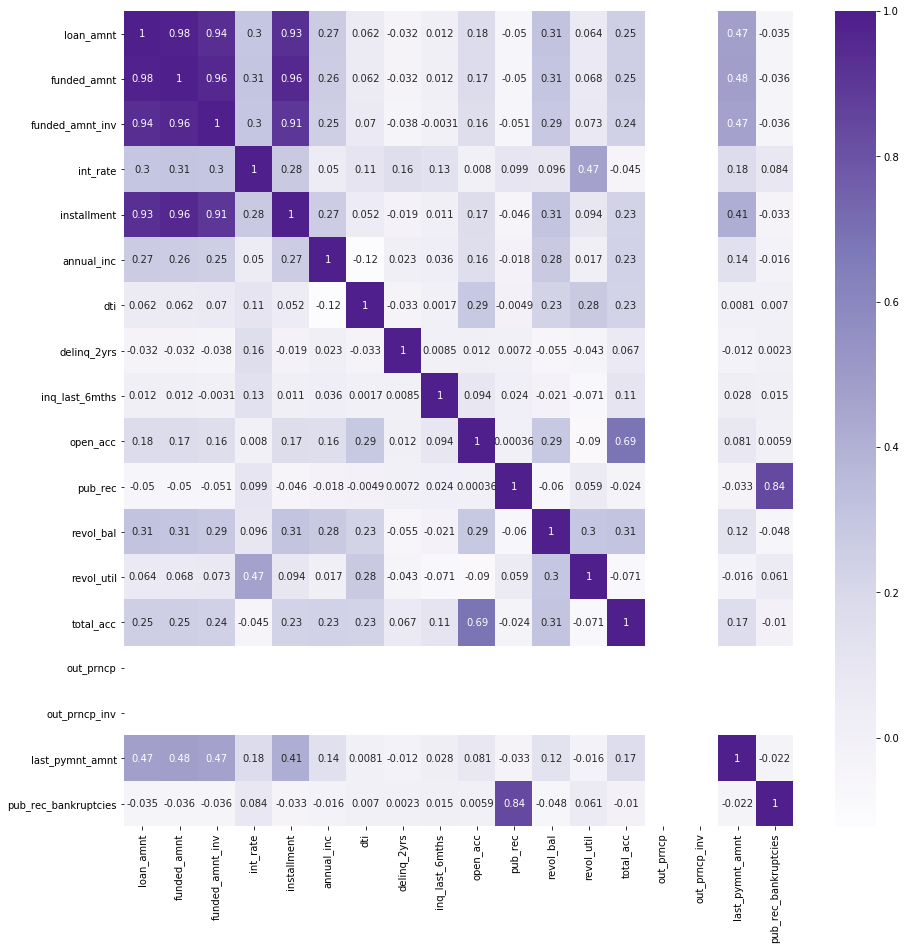

In [23]:
# plotting the heatmap
plt.figure(figsize=(15,15))
sns.heatmap(
    correl,
    annot=True,
    center=0.5,
    cmap='Purples')

plt.show()

We can observe that *loan_amnt*, *funded_amnt*,*funded_amnt_inv* and *installemments* are heavily correlated to each other so we can go ahead plot the univariate plot for any one of the variable

#### Distribution of loan amount

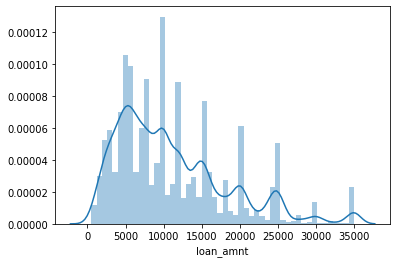

In [24]:
# Univariate analysis of loan amount
sns.distplot(loan['loan_amnt'])

A huge chunk of loans or credits are between 5000 dollars to 15,000 dollars. The distribution is somewhat right skewed

#### Distribution of annual income

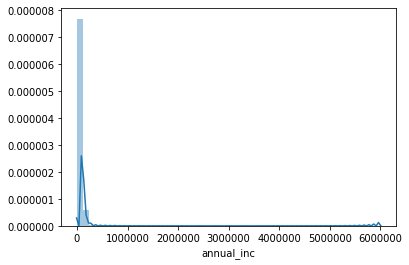

In [25]:
sns.distplot(loan['annual_inc'])

Important thing to notice here is that about the entire chunk of the borrowers make less than six-figure salary. There are a few outliers who make above 500M dollars, and these borrowers could be businesses or start-ups

#### Debt to Income ratio for default borrowers

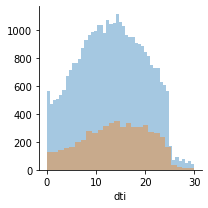

In [26]:
g = sns.FacetGrid(loan, hue="loan_status")
g.map(sns.distplot, "dti",kde=False)

The distribution of DTI is almost similar for both categories, that is the mean DTI and variance does not differ for fully paid or charged off customers

#### Revolving Utilization Rate

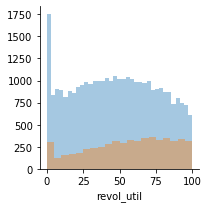

In [27]:
g = sns.FacetGrid(loan, hue="loan_status")
g.map(sns.distplot, "revol_util",kde=False)

There is a huge variance in the revolving utilization for all the borrowers, while the distribution is almost similar for both fully paid and charged off customers

#### Univariate frequency distribution for categorical variables

Text(0.5, 1, 'Frequency Distribution for Home Ownership status')

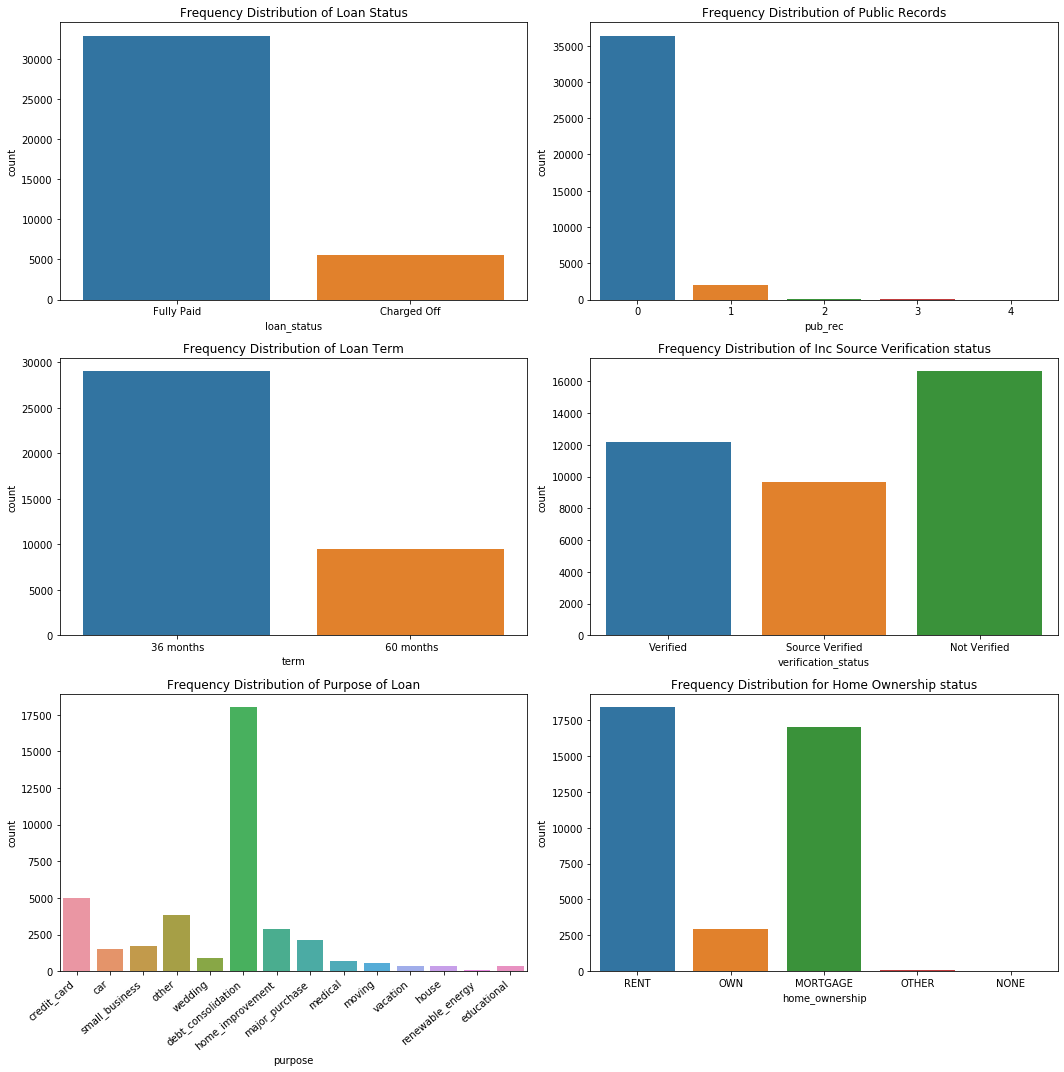

In [28]:
fig, axes = plt.subplots(3,2,figsize=(15,15))

sns.countplot(loan['loan_status'],ax=axes[0][0])
axes[0][0].set_title('Frequency Distribution of Loan Status')

sns.countplot(loan['pub_rec'],ax=axes[0][1])
axes[0][1].set_title('Frequency Distribution of Public Records')

sns.countplot(loan['term'],ax=axes[1][0])
axes[1][0].set_title('Frequency Distribution of Loan Term')

sns.countplot(loan['verification_status'],ax=axes[1][1])
axes[1][1].set_title('Frequency Distribution of Inc Source Verification status')

sns.countplot(loan['purpose'],ax=axes[2][0])
axes[2][0].set_title('Frequency Distribution of Purpose of Loan')
axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

sns.countplot(loan['home_ownership'],ax=axes[2][1])
axes[2][1].set_title('Frequency Distribution for Home Ownership status')



##### Observations and findings:
* *Loan Status* - The data contains maximum borrowers who've already repaid their loan
* *Public Records* - Most borrowers don't have  public records in their name
* *Term* - The term for most of the loans is 36 months
* *Verification Status* - Most borrowers do not have their income source verified
* *Purpose of the Loan* - A significant proportion of borrowers have taken loans for the purpose of debt consolidation
* *Home Ownership Status* - Very few borrowers actually own a home. Most have a Mortgage or are on Rent

### Bivariate Analysis

Our approach here would be to essentially check how the *charged off* customers fared given a certain factor and if it was significant enough to affect the *loan_status* <br>

For categorical columns, the % of borrowers belonging to the various categories under each of the type of loan status was checked. If a certain category showed significant variance amongst the status, we considered those as crucial in determining whether customers default <br>

Discrete numerical columns such as *public records of bankruptcies* and *derogatory public records* were treated as category, on a case to case basis. For the rest we plotted multivariate bar plots to check if they have any effect

#### Public Records of a borrower
We would want to analyse whether having a punlic record in terms of bankruptcy or derogatory credit history affects the possibility of a customer to default. <br>

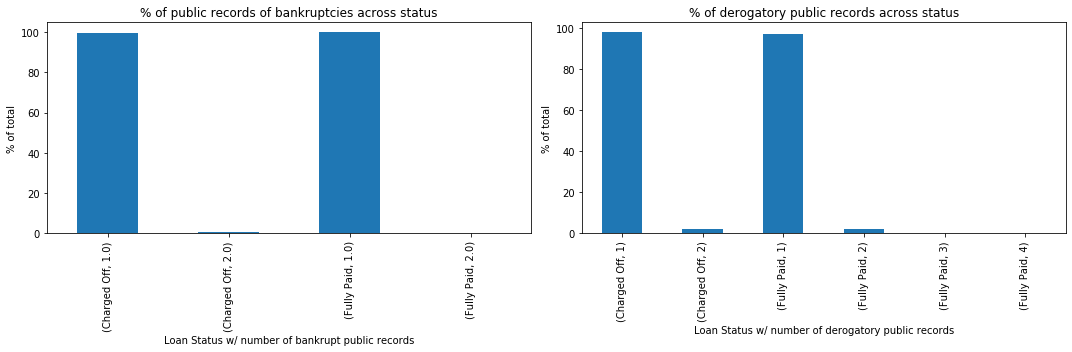

In [29]:
# importing the required library
import matplotlib.pyplot as plt
%matplotlib inline

# creating subplots
fig, axes = plt.subplots(1,2,figsize=(15,5))

# evaluating the % share of customers across having one or more than public records for the various loan status
c = loan[~(loan['pub_rec_bankruptcies']==0)].groupby(['loan_status','pub_rec_bankruptcies'])['id'].count()
((c / c.groupby(level=[0]).transform("sum"))*100).plot(kind='bar',ax=axes[0])

# setting the title and labels for the chart
axes[0].set_title('% of public records of bankruptcies across status')
axes[0].set(xlabel='Loan Status w/ number of bankrupt public records', ylabel = '% of total')

c = loan[~(loan['pub_rec']==0)].groupby(['loan_status','pub_rec'])['id'].count()
((c / c.groupby(level=[0]).transform("sum"))*100).plot(kind='bar',ax=axes[1])
axes[1].set_title('% of derogatory public records across status')
axes[1].set(xlabel='Loan Status w/ number of derogatory public records', ylabel = '% of total')

plt.tight_layout()

The above plots tell us how having public records in your name affect the probability of a borrower to default. We observe that out of the total public records, about 99% of those under any of the loan status have atleast one public record, which leads us to believe that public records don't really drive or affect somebody's capability to repay back the loan

#### Open credit lines
A borrower's percentage of open credit lines, i.e number of loans that he is yet to repay back as a percentage of total credit line, might provide us some insight into whether, having too many loans leads someone to default

In [30]:
# creating a variable for % of total credit lines that are still open
loan['% of open acc'] = loan['open_acc']*100/loan['total_acc']

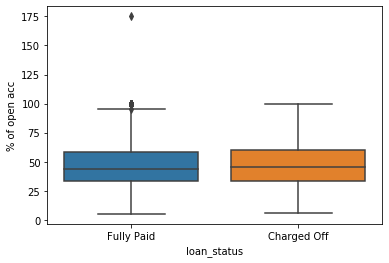

In [31]:
import seaborn as sns

# observing the spread of data across the various loan status
sns.boxplot('loan_status','% of open acc',data=loan)

The above plot tells us that the spread of % of open accounts doesn't vary much for fully paid or default customers. We observe as similar variance in the credit lines that are open for any status type. <br>

Hence, having too many open credit lines doesn't necessarily drive someone to default

#### Income Source Verification
Whether a borrower has their income verified or not could be an indicator of defaulting. We can check it out from the following analysis

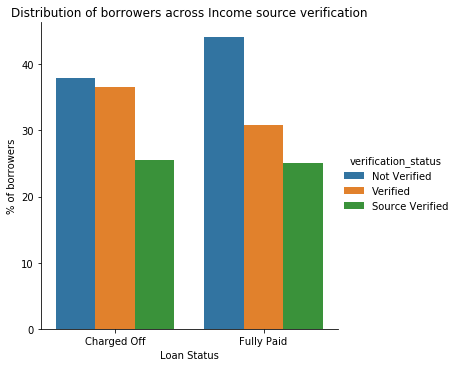

In [32]:
# Grouping by the loan status and obtaining the % of borrowers being each category

(loan
.groupby('loan_status')['verification_status']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),
      x='loan_status',y='percent',hue='verification_status',kind='bar'))

plt.title('Distribution of borrowers across Income source verification')
plt.xlabel('Loan Status')
plt.ylabel('% of borrowers')
plt.show()

The chart is counterintuitive, because we'd expect borrowers who don't have their income verified to have a greater possibility to default. However, for *fully paid* status the % of Not Verified borrowers higher than that of *charged off* status. <br>
Similarly, the % of Verified borrowers are more for the *charged off* status, which paints a whole different picture. We can then conclude that verification status is not a good driver of borrower being *charged off*

Infact, borrowers who had fully paid were about 5% more likely to not get verified than default borrowers

#### Term of the loan


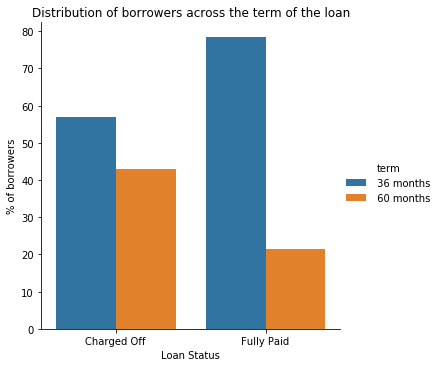

In [33]:
(loan
.groupby('loan_status')['term']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x='loan_status',y='percent',hue='term',kind='bar'))

plt.title('Distribution of borrowers across the term of the loan')
plt.xlabel('Loan Status')
plt.ylabel('% of borrowers')
plt.show()

The term or the duration of the loan brings out an interesting insight in that it tells us whether borrowers who have a 60 months duration are more likely to default. The data tells us that given the loan duration is 60 months, the probability to *charge off* is about 20% more than the *fully paid* borrowers. <br>

Infact, it's 22% more likely to repay back than become default borrower if the loan duration is low. Thus the duration of the loan could be a good indicator of loan status <br>

#### Significance of other important variables

[Text(0, 0.5, '% of total'), Text(0.5, 0, 'Loan Status')]

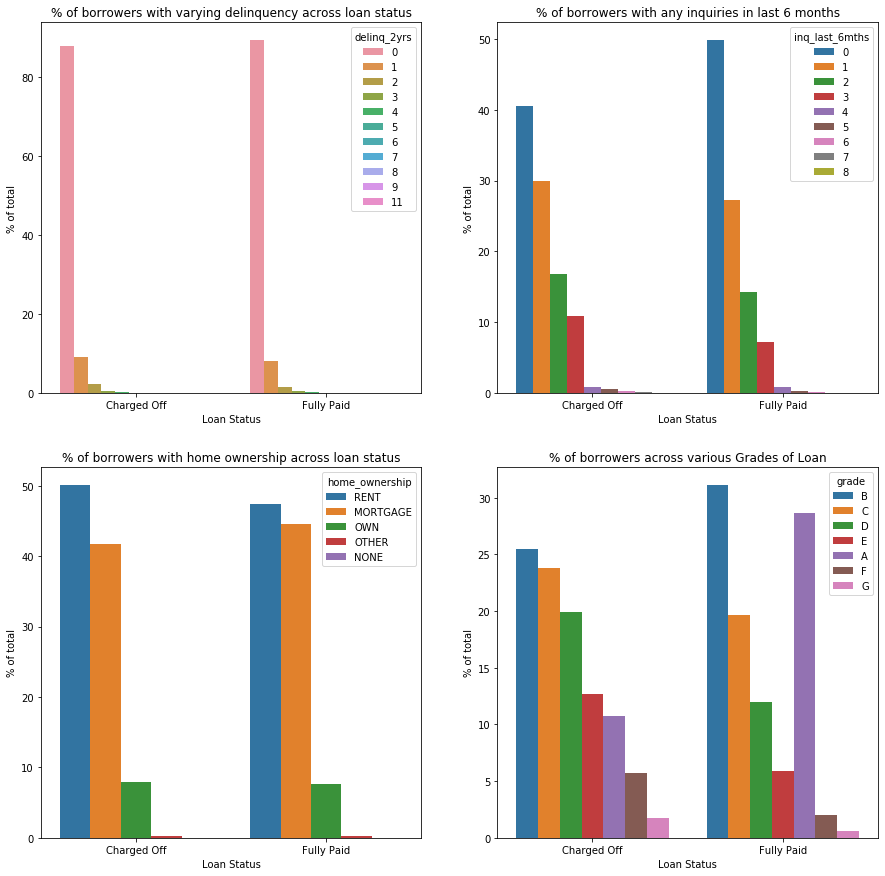

In [34]:
fig, axes = plt.subplots(2,2, figsize=(15,15))

# Loan status vs delinquency
(loan
.groupby('loan_status')['delinq_2yrs']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='loan_status',y='percent',hue='delinq_2yrs', ax=axes[0][0]))

axes[0][0].set_title('% of borrowers with varying delinquency across loan status')
axes[0][0].set(xlabel='Loan Status', ylabel = '% of total')

# Loan status vs inquiries in the last 6 months
(loan
.groupby('loan_status')['inq_last_6mths']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='loan_status',y='percent',hue='inq_last_6mths', ax=axes[0][1]))

axes[0][1].set_title('% of borrowers with any inquiries in last 6 months')
axes[0][1].set(xlabel='Loan Status', ylabel = '% of total')

# Loan status vs Home Ownership
(loan
.groupby('loan_status')['home_ownership']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='loan_status',y='percent',hue='home_ownership', ax=axes[1][0]))


axes[1][0].set_title('% of borrowers with home ownership across loan status')
axes[1][0].set(xlabel='Loan Status', ylabel = '% of total')

# Loan status vs Grade of the loan
(loan
.groupby('loan_status')['grade']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='loan_status',y='percent',hue='grade', ax=axes[1][1]))

axes[1][1].set_title('% of borrowers across various Grades of Loan')
axes[1][1].set(xlabel='Loan Status', ylabel = '% of total')

* *delinq_2yrs* - The first chart analyses how the default % varies for borrowers who have been delinquent for various months in the past two years. <br>
We can observe that for both *fully paid* and *default* borrowers, the % borrowers are mostly same for the different months that they have been delinquent for. This tells us that being delinquent for more than a few months doesn't necesaarily mean that one would default

* *inq_last_6mths* - This variable provides information regarding, inquiries against the borrowers. Hypothesis is thatborrowers who have more number of inquiries on their credit file against them in the last 6 months would have a higher chance to default <br>
Interestingly our analysis yields similar results, borrowers who have repaid the full amount were about 10% more likely than default customers to have **NO** inquiries on their credit file
As the number of inquiries in the past 6 months go higher, the likelihood of borrowers defaulting increases as seen from the data

* *home_ownership* - Home ownership doesn't result in any useful insight as to how they affect the probability of someone defaulting

* *Grade* - The grade of the loan is really a direct outcome based variable, based on the credit history of the borrower. High risk borrower, once identified through a similar analysis, are charged higher interest rates thus the grade of the loan also changes. <br>
Hence, we observe that default borrowers have a higher likelihood (about 10%) of a Grade E loan, but this relationship is not causal. Perhaps, decreasing the grade of the loan can actually enable someone to repay their loans quicker, hence reducing the chances of defaulting



#### Job Experience

In [35]:
loan.emp_length.value_counts()

10+ years       8478
< 1 year        4488
2 years         4280
3 years         4001
4 years         3328
5 years         3180
1 year          3154
6 years         2164
7 years         1707
8 years         1430
9 years         1223
Not Provided    1025
Name: emp_length, dtype: int64

In [36]:
# creating a function to categorize the borrowers into various experience buckets
def emp_length(n):
    if n in ['< 1 year','1 year']:
        return 'Low Exp'
    elif n in ['2 years','3 years','4 years']:
        return 'Medium Exp'
    elif n in ['5 years','6 years','7 years']:
        return 'High Exp'
    elif n in ['Not Provided']:
        return 'Not Provided'
    else:
        return 'Very High Exp'

loan['emp_len'] = loan['emp_length'].apply(lambda x: emp_length(x))

In [37]:
loan['emp_len'].value_counts()

Medium Exp       11609
Very High Exp    11131
Low Exp           7642
High Exp          7051
Not Provided      1025
Name: emp_len, dtype: int64

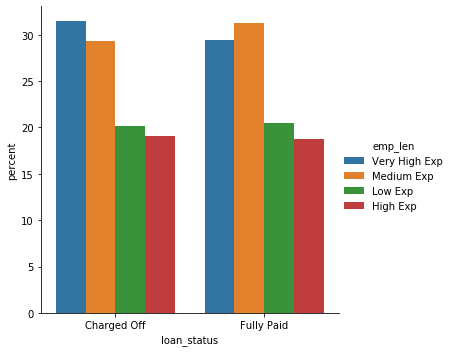

In [38]:
(loan[loan['emp_len']!='Not Provided']
.groupby('loan_status')['emp_len']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='emp_len',kind='bar'))


The borrowers having very high experience (8 to 10+ years) are more in number.This variable doesn't seem to help in predicting the default borrowers as there is no significance difference between these two status <br>

#### Purpose of the loan

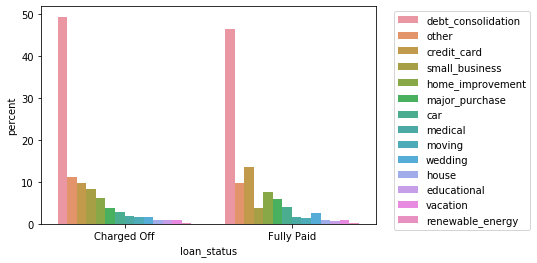

In [39]:
(loan
.groupby('loan_status')['purpose']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='loan_status',y='percent',hue='purpose'))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Most of the borrowers have opted for a debt consolidation option which means that they want to repay all their other liabilities and debts with one loan. <br>
Also, the likelihood of borrowers being charged off is about 5% more if the purpose of the loan is to open a small business. 

#### Approach for continuous variables like loan amount, annual income, DTI, Interest rates etc.
Since, continuous variables for our use case vary from person to person and there's no proper metric to evaluate a central tendency that can accurately represent the entire population due to it's high variance, dividing the values into 4 different buckets that represent the various stratas of the population would make more sense <br>
We then analysed the effect of these variable like we did for the categorical columns <br>
We performed a correlation analysis first to, not consider correlated variables twice. Then the variable were analysed separately

#### Loan Amount

In [40]:
# Putting Loan amount into bins
loan['loan_amnt_bin']=pd.cut(loan.loan_amnt,4,labels=['low','medium','high','very high'])

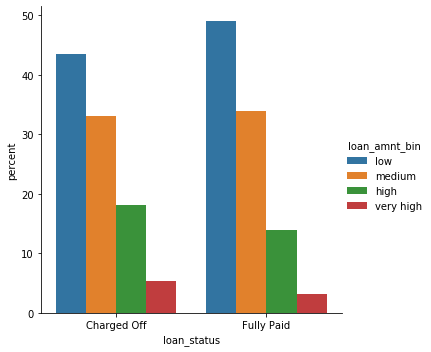

In [41]:
(loan
.groupby('loan_status')['loan_amnt_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='loan_amnt_bin',kind='bar'))

The above plot shows us that the percentage of borrowers across different buckets of loan amount for each loan status.<br>
Despite having more number of borrowers recorded in low range, We can see that the % of borrowers with in the low and medium range for *Charged Off* are lower than *Fully paid* Satus where as the borrowers with loan amount in high and very high range seems to be more likely to default.

#### Annual Income

In [42]:
loan.annual_inc.describe()

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The annual income is varying with minimum range of 4,000 to maximum range of 6,000,000. The median annual income is 60,000<br>
Let's see if dividing the annual income into buckets could provide us any insight

In [43]:
# annual income
loan['annual_inc_bin']=pd.cut(loan.annual_inc,[0,50000,150000,300000,6000000],labels=['low','medium','high','very high'])

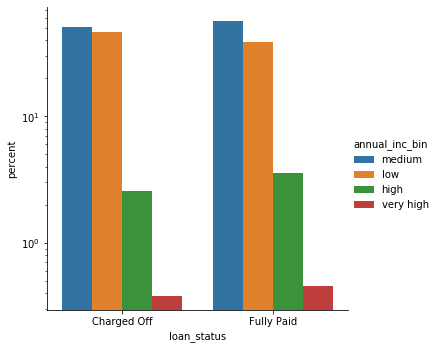

In [44]:
a=(loan
.groupby('loan_status')['annual_inc_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='annual_inc_bin',kind='bar'))
plt.yscale('log', nonposy='clip')


From the above plot we can say that  the most of the borrowers have annual income in medium range (5000-150000). We can also see that borrowers with low income have slighty high percentage of being charged off rather than that the percentage of the borrowers are almost same across different loan status  which is why we just can't really conclude that solely annual income variable could drive the borrower being charged off.<br>




#### Interest Rate

In [45]:
# interest rate
loan['int_rate_bin']=pd.cut(loan.int_rate,3,labels=['low','medium','high'])

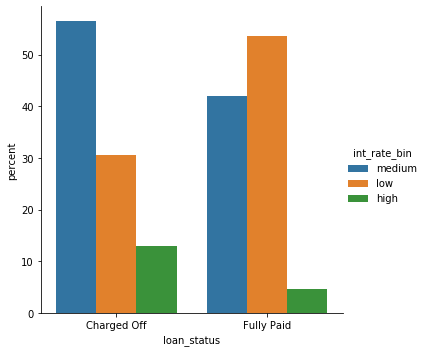

In [46]:
a=(loan
.groupby('loan_status')['int_rate_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='int_rate_bin',kind='bar'))

The above plot shows us that the percentage of borrowers across different buckets of interest rate for each loan status.<br>
It's patently clear that most of the accounts with high interest rate end up becoming default inevitably.

#### Installments

In [47]:
loan['installment_bin']=pd.cut(loan.installment,3,labels=['low','medium','high',])

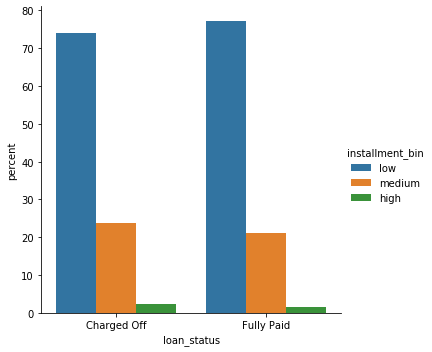

In [48]:
a=(loan
.groupby('loan_status')['installment_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='installment_bin',kind='bar'))


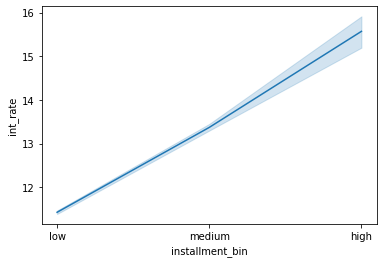

In [49]:
sns.lineplot(y="int_rate", x="installment_bin",data=loan)

The above two plots shows us high amount installments are making borrowers getting charged Off at a very low level of variance.As Installments are proportional to interest rates we can consider Interest rate as a driving factor 

#### Debt to Income Ratio


In [50]:
loan['dti_bin']=pd.cut(loan.dti,3,labels=['low','medium','high'])

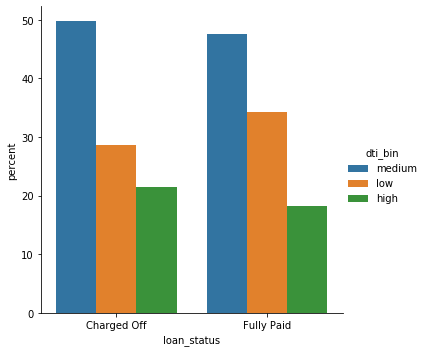

In [51]:
a=(loan
.groupby('loan_status')['dti_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='dti_bin',kind='bar'))

we can infer that accounts with the *Debt to Income* ratio higher than 20% have high probability to get *Charged Off*.So, we can conclude that higher the DTI, higher the chances of borrower being default

#### Revolving line Utilization rate


In [52]:
loan['revol_util_bin']=pd.cut(loan.revol_util,4,labels=['low','medium','high','very high'])

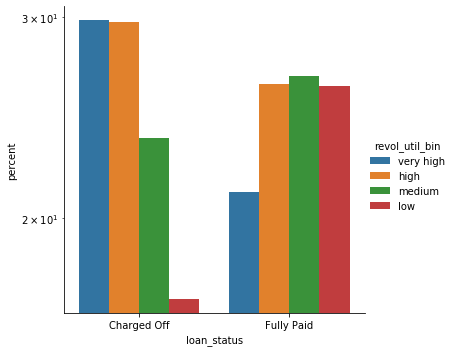

In [53]:
(loan
.groupby('loan_status')['revol_util_bin']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'),x='loan_status',y='percent',hue='revol_util_bin',kind='bar'))
plt.yscale('log', nonposy='clip')

From the above plot we see that the revolving line utilization rate at high range is indeed high for charged Off accounts which means the borrower has used higher amount of credit relative to all available revolving credits and comes out to be default.Hence we can consider this variable which can detect the existence of defaulters.

#### Earliest Credit Line


In [54]:
loan['earliest_cr_line_year']=loan['earliest_cr_line'].dt.year

In [55]:
loan.loc[loan['earliest_cr_line_year']>2011, 'earliest_cr_line_year']=loan['earliest_cr_line_year']-100

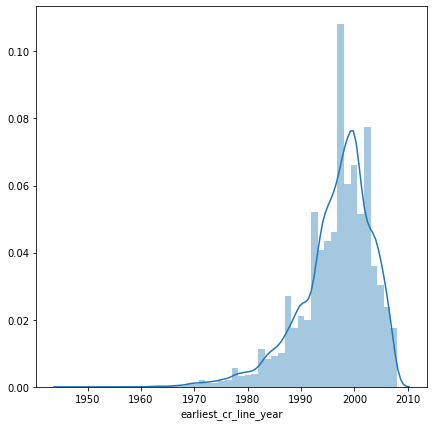

In [56]:
figure= plt.subplots(1,0,figsize=(7,7))
sns.distplot(loan['earliest_cr_line_year'])
plt.show()

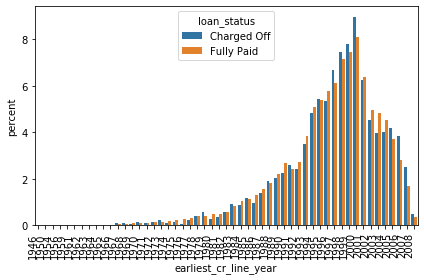

In [57]:
ax = (loan
.groupby('loan_status')['earliest_cr_line_year']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'),x='earliest_cr_line_year',y='percent',hue='loan_status'))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

Most of the borrowers (approximately 8%) have the earliest credit line in 2000's.
we could also see that the Charged Off rate is high over the last few years which means that borrowers who might have opened account recently likely to get Charged Off.But the variance is not consistent over the years which might not  be usefull to predict defaulters.

### Multivariate Analysis

##### **Loan Amount- Annual Income - Loan Status**





In [58]:
loan.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.8,0.85,0.9,0.99])

count    3.845800e+04
mean     6.884550e+04
std      6.425580e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
80%      9.000000e+04
85%      1.000000e+05
90%      1.152000e+05
99%      2.342580e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

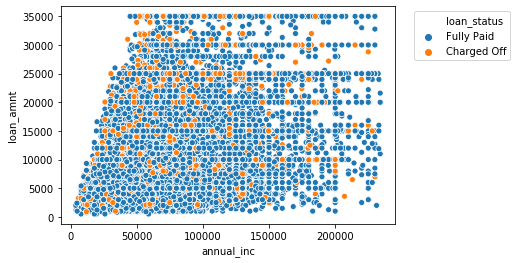

In [59]:
sns.scatterplot(x="annual_inc", y="loan_amnt",
                     hue="loan_status", data=loan[loan['annual_inc']<=234000])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


The above plot shows us that most of the borrowers with low annual income and high loan amount are subjected to charged off.

##### **Loan Amount - Verification Status - Loan Status**





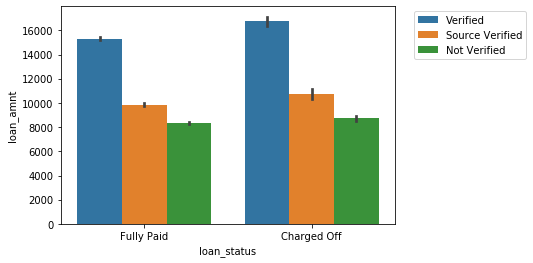

In [60]:
sns.barplot(x='loan_status',y='loan_amnt',hue='verification_status',data=loan)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

High amount of loans have high Charged Off rate even being verified oftentimes.As mentioned earlier this won't help us in predicting Defaulters

##### **Loan Amount - Term - Loan Status**





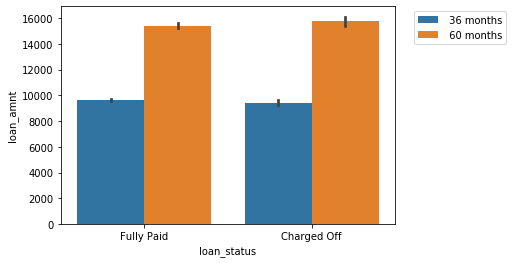

In [64]:
sns.barplot(x='loan_status', y='loan_amnt', hue="term", data=loan)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Huge amount of loans are given a term period of 60 Months and in return it is experiencing more default borrowers.<br>
Let's see how interest rate is behaving with term and loan _amount variables

##### **Interest Rate - Term - Loan Status**





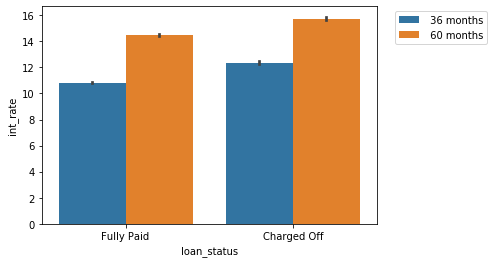

In [63]:
sns.barplot(x='loan_status', y='int_rate', hue="term", data=loan)

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

As the loan amount increases, The interest rate also increases which is why the borrowers with term period of 60 months are likely to become default

##### **Term - Loan Amount - Grade**





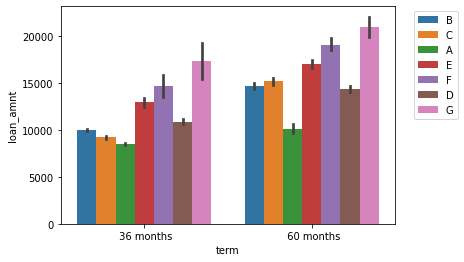

In [ ]:
sns.barplot(x='term',y='loan_amnt',hue='grade',data=loan)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

As seen earlier Higher loan amounts are associated with term period of 60 months even for low grades

##### **Employe length - Loan Amount - Loan Status**





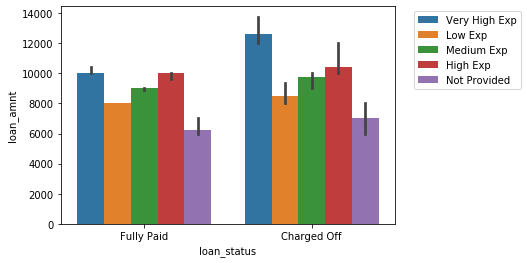

In [65]:
sns.barplot(x='loan_status',y='loan_amnt',hue='emp_len',data=loan,estimator=np.median)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The borrowers with very high experience seems to take huge amounts of loan and likely to get charged off 

##### **Open Account - DTI - Loan Status**





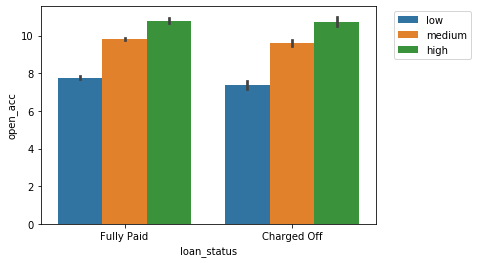

In [66]:
sns.barplot(x='loan_status', y='open_acc', hue='dti_bin',data=loan)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The Debt to income ratio is proportional to count of open accounts. More the number of open accounts in borrower's profile more the DTI ratio

##### **Interest rate - Delinq_2years - Loan Status**





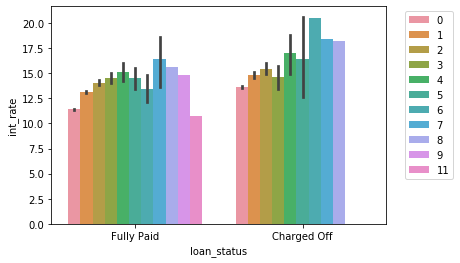

In [67]:
sns.barplot(loan.loan_status,loan.int_rate,loan.delinq_2yrs)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The number of delinquencies borrowed made is more at high interest rates for Charged Off accounts


##### **Loan Amount - Purpose - Loan Status**





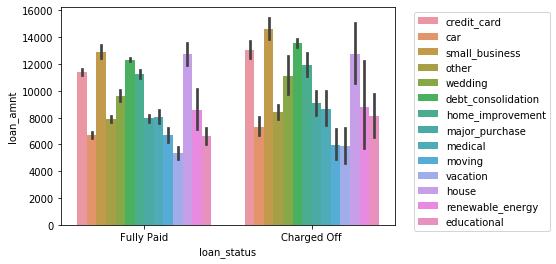

In [68]:
sns.barplot(x='loan_status',y='loan_amnt',hue='purpose',data=loan)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

The Borrowers having pupose as Small Business, Debt Consolidation and credit card seems to apply for higher amount of loans and can be expected to get Charged off.

### **Final Recommendations**

Based on our exploratory data analysis, we came up with the following insights and findingds along with the significant drivers that might help determine if a borrower is high risk or is able to repay his/her loan in time

* On observing the proportion of customers under each category for both default as well as fully paid borrowers, we found the following variables to make a difference between the above sets of borrowers
    * **Purpose of the loan** - Borrowers who has taken loan to open a small business were about 5% more likely to default. Loan on credit card was significantly more for the fully paid customers
    * **Inquiries in the last 6 months** - Borrowers with more number of inquiries on their credit history were a bit more likely to default
    * **Term of Loan** - The term of the loan had a huge effect on the likelihood of someone being default. We observed that default borrowers had a higher % of loans that were for 60 months. <br>
    This could be because, a borrower has a higher interest levied if the term is longer which in turn results in them not being able to repay back the loan
    * **Grade** - Although, Grade of a loan had a significant role in driving the borrowers to default or fully paid category, we believe that it is a direct result of careful scrutiny of the borrowers<bR>
    Borrowers, who are found to have bad credit history based on various factors, are charged higher interest rates and hence the grade of the loan increases. Hence, Grade is a dependant variable, which relies on the ability to identify borrowers who might default in the long run and hence apply appropriate interest rates on them

* Analysis of continuous variables derived some useful insights as well:
     * **Loan Amount** - We observed that borrowers who had borrowed loan amount in the higher range were slightly (about 3%) more likely to default
     * **Interest Rates** - Borrowers with high interest rate levied on them, were significantly more likely to default. However, it is again a direct result of being able to identify risky borrowers and levy huge interest rates on them
     * **Debt to Income Ratio** - If the debt to income ratio falls in the higher range, a borrower is more likely to default (3%-4%)
     * **Revolving Line Utilization Rate** - Revolving Line Utilization is the % of credit available that is being utilized. Usually, from a borrower's point of view it should lie in the lower range. <br>
     We noticed that borrowers utilizing within their limits were 10% more likely to not default <br>
     Charged off customers were utlizing a huge % of the credit available <br>
     Very few borrowers who had defaulted, were found to be in the low range of utilization, hence it could be a driving factor for defaulting
